### Example for using function load_data and printing dataset 

In [1]:
from hw3_utils import load_data
#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=1.000001
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
print('Current training data size is %i'%train_set_x.shape[0])
print('Current validation data size is %i'%valid_set_x.shape[0])
print('Current test data size is %i'%test_set_x.shape[0])

Current training data size is 40000
Current validation data size is 9999
Current test data size is 10000


Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)


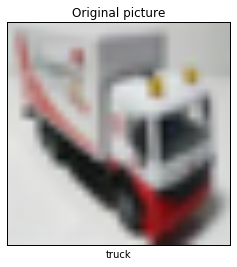

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Choose an image index
i=15
plt.imshow(np.reshape(valid_set_x[i],(3,32,32)).transpose(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title('Original picture')
plt.xlabel('%s'%class_[valid_set_y[i]])

# ECBM E6040 Homework 3 - Programming Problem

### Problem 1: Implement the convolutional neural network depicted in this problem

test_lenet take few arguments to define the architecture of CNN and to train model:
ds_rate,learning_rate, n_epochs,nkerns, batch_size

test_lenet take arguments to augment the training images :

1)M , N : amount the images will be translated randomly sideways and up/down in range(-M,M), range (-N,N) respectively
2)Rot : images are roatated randomly with angle in range(-Rot, Rot)
3)flip: True if images are to be fliped randomly 
4)switch_noise: 0 if no randomly distributed noise to be injected, 1 if random gaussian noise to be injected with 0 mean and var_noise variance, 2 if random uniform  noise to be injected with 0 mean and var_noise variance 




In [3]:
from hw3 import test_lenet
test_lenet(ds_rate=None,learning_rate=0.1, n_epochs=200,nkerns=[32, 64], batch_size=500, M=0, N=0, Rot=0, Flip=False,switch_noise=0,var_noise=0, verbose=True, prob=1)

... building the model
... training
swith_noise
0
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
training @ iter =  400
training @ iter =  500
training @ iter =  600
epoch 1, minibatch 625/625, validation error 89.883814 %
     epoch 1, minibatch 625/625, test error of best model 89.993990 %
training @ iter =  700
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
training @ iter =  1200
epoch 2, minibatch 625/625, validation error 89.883814 %
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
epoch 3, minibatch 625/625, validation error 89.863782 %
     epoch 3, minibatch 625/625, test error of best model 90.004006 %
training @ iter =  1900
training @ iter =  2000
training @ iter =  2100
training @ iter =  2200
training @ iter =  2300
training @ iter =  2400
epoch 4, minibatch 625/625, validation error 89.883

/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
The training process for function test_lenet ran for 8.70m


Best validation error of 89.863782 % obtained at iteration 1875, with test performance 90.004006 %


### Problem 2: Bullet 1: Augmentation by translation

Show a 4*4 figure of 16 input images with this augmentation

modify function is used to transform images. modify function takes arguments
images, translate, M, N, rotate, Rot, flip,switch_noise=0,var_noise=0
1) images : images to be transformed 
2) translate: 1 if images are to be translated 
3) M , N : amount the images will be translated randomly sideways and up/down in range(-M,M), range (-N,N) respectively
4) rotate : 1 if images are to be rotated
5) Rot : images are roatated randomly with angle in range(-Rot, Rot)
6) flip: True if images are to be fliped horizontally randomly 
7) switch_noise: 0 if no randomly distributed noise to be injected
                 1 if random gaussian noise to be injected with 0 mean and var_noise variance
                 2 if random uniform  noise to be injected with 0 mean and var_noise variance 


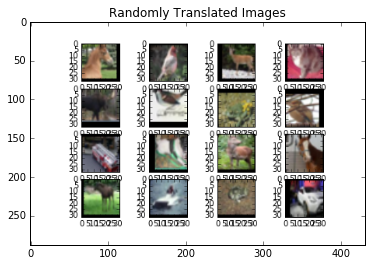

In [4]:
import numpy
from matplotlib import pyplot as plt

from hw3_utils import shared_dataset, load_data
from hw3_nn import modify
% matplotlib inline

datasets = load_data(ds_rate=1.000001,theano_shared=False)
batch_size=64

train_set_x, train_set_y = datasets[0] # randomly take 16 from these

index_array = numpy.arange(len(train_set_x))

numpy.random.shuffle(index_array)

top_16=train_set_x[index_array[:16]]

f, axarr = plt.subplots(4, 4)

for i in range(0,4):
    for j in range(0,4):
        x = modify( [top_16[4*i+j]], 1, 5, 5, 0,0, False)
        plt.axes(axarr[i,j])
        plt.imshow(x[0].transpose(1,2,0))
        
f.savefig('translate.png')
plt.close(f)

import matplotlib.image as mpimg
img=mpimg.imread('translate.png')
plt.imshow(img)
plt.title("Randomly Translated Images")


Implement the neural network with this augmentation, show the improvement

Traning images will be translated randomly sideways and up/down in range(-M,M), range (-N,N) respectively

In [1]:
from hw3 import test_lenet

test_lenet(ds_rate=None,learning_rate=0.1, n_epochs=300,nkerns=[32, 64], batch_size=500, M=5, N=5, Rot=0, Flip=False,switch_noise=0,var_noise=0, verbose=True)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
... training
Data Augmentation with translate with
5
5
swith_noise
0
training @ iter =  0
epoch 1, minibatch 80/80, validation error 53.863158 %
     epoch 1, minibatch 80/80, test error of best model 54.210000 %
training @ iter =  100
epoch 2, minibatch 80/80, validation error 47.042105 %
     epoch 2, minibatch 80/80, test error of best model 47.710000 %
training @ iter =  200
epoch 3, minibatch 80/80, validation error 43.484211 %
     epoch 3, minibatch 80/80, test error of best model 43.480000 %
training @ iter =  300
epoch 4, minibatch 80/80, validation error 41.452632 %
     epoch 4, minibatch 80/80, test error of best model 40.760000 %
epoch 5, minibatch 80/80, validation error 38.505263 %
     epoch 5, minibatch 80/80, test error of best model 39.230000 %
training @ iter =  400
epoch 6, minibatch 80/80, validation error 37.768421 %
     epoch 6, minibatch 80/80, test error of best model 37.930000 %
training @ iter =  500
epoch 7, minibatch 80/80, validati

The training process for function test_lenet ran for 121.01m


### Problem 2: Bullet 2: Augmentation by rotation

Show a 4*4 figure of 16 input images with this augmentation

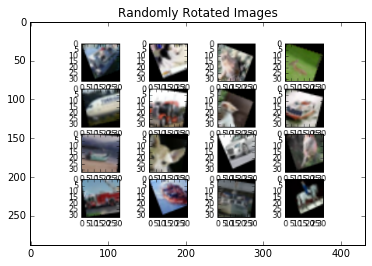

In [6]:
import numpy
from matplotlib import pyplot as plt

from hw3_utils import shared_dataset, load_data
from hw3_nn import modify
% matplotlib inline

datasets = load_data(ds_rate=1.000001,theano_shared=False)
batch_size=64

train_set_x, train_set_y = datasets[0] # randomly take 16 from these

index_array = numpy.arange(len(train_set_x))

numpy.random.shuffle(index_array)

top_16=train_set_x[index_array[:16]]

f, axarr = plt.subplots(4, 4)

for i in range(0,4):
    for j in range(0,4):
        x = modify( [top_16[4*i+j]], 0, 0, 0, 1,25, False)
        plt.axes(axarr[i,j])
        plt.imshow(x[0].transpose(1,2,0))
        
f.savefig('rotate.png')
plt.close(f)

import matplotlib.image as mpimg
img=mpimg.imread('rotate.png')
plt.imshow(img)
plt.title("Randomly Rotated Images")

Implement the neural network with this augmentation, show the improvement

Training images are roatated randomly with angle in range(-Rot, Rot)

In [2]:
from hw3 import test_lenet
test_lenet(ds_rate=None,learning_rate=0.1, n_epochs=300,nkerns=[32, 64], batch_size=500, M=0, N=0, Rot=25, Flip=False,switch_noise=0,var_noise=0, verbose=True)

... building the model
... training
Data Augmentation with rotation
25
swith_noise
0
training @ iter =  0
epoch 1, minibatch 80/80, validation error 55.515789 %
     epoch 1, minibatch 80/80, test error of best model 55.320000 %
training @ iter =  100
epoch 2, minibatch 80/80, validation error 48.621053 %
     epoch 2, minibatch 80/80, test error of best model 49.010000 %
training @ iter =  200
epoch 3, minibatch 80/80, validation error 44.726316 %
     epoch 3, minibatch 80/80, test error of best model 44.660000 %
training @ iter =  300
epoch 4, minibatch 80/80, validation error 42.736842 %
     epoch 4, minibatch 80/80, test error of best model 42.300000 %
epoch 5, minibatch 80/80, validation error 40.757895 %
     epoch 5, minibatch 80/80, test error of best model 40.700000 %
training @ iter =  400
epoch 6, minibatch 80/80, validation error 39.421053 %
     epoch 6, minibatch 80/80, test error of best model 39.300000 %
training @ iter =  500
epoch 7, minibatch 80/80, validation erro

The training process for function test_lenet ran for 120.54m


### Problem 2: Bullet 3: Augmentation by flipping

Show a 4*4 figure of 16 input images with this augmentation

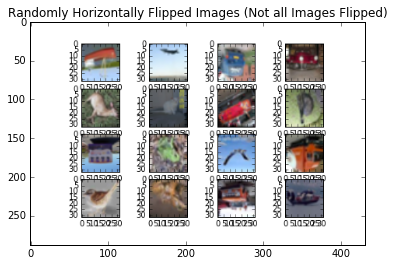

In [8]:
import numpy
from matplotlib import pyplot as plt

from hw3_utils import shared_dataset, load_data
from hw3_nn import modify
% matplotlib inline

datasets = load_data(ds_rate=1.000001,theano_shared=False)
batch_size=64

train_set_x, train_set_y = datasets[0] # randomly take 16 from these

index_array = numpy.arange(len(train_set_x))

numpy.random.shuffle(index_array)

top_16=train_set_x[index_array[:16]]

f, axarr = plt.subplots(4, 4)


for i in range(0,4):
    for j in range(0,4):
        x = modify( [top_16[4*i+j]], 0, 0, 0, 0,0, True)
        plt.axes(axarr[i,j])
        plt.imshow(x[0].transpose(1,2,0))
        
f.savefig('flipped.png')
plt.close(f)

import matplotlib.image as mpimg
img=mpimg.imread('flipped.png')
plt.imshow(img)
plt.title("Randomly Horizontally Flipped Images (Not all Images Flipped)")

Implement the neural network with this augmentation, show the improvement

Training images are to be fliped horizontally randomly 

In [9]:
from hw3 import test_lenet
test_lenet(ds_rate=None,learning_rate=0.1, n_epochs=300,nkerns=[32, 64], batch_size=500, M=0, N=0, Rot=0, Flip=True ,switch_noise=0,var_noise=0, verbose=True)

... building the model
... training
Horizontal Flipping
swith_noise
0
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
training @ iter =  400
training @ iter =  500
training @ iter =  600
epoch 1, minibatch 625/625, validation error 59.595353 %
     epoch 1, minibatch 625/625, test error of best model 59.935897 %
training @ iter =  700
training @ iter =  800
training @ iter =  900
training @ iter =  1000
training @ iter =  1100
training @ iter =  1200
epoch 2, minibatch 625/625, validation error 53.856170 %
     epoch 2, minibatch 625/625, test error of best model 54.216747 %
training @ iter =  1300
training @ iter =  1400
training @ iter =  1500
training @ iter =  1600
training @ iter =  1700
training @ iter =  1800
epoch 3, minibatch 625/625, validation error 50.560897 %
     epoch 3, minibatch 625/625, test error of best model 50.460737 %
training @ iter =  1900
training @ iter =  2000
training @ iter =  2100
training @ iter =  2200
training 

The training process for function test_lenet ran for 22.15m


### Problem 2: Bullet 4: Augmentation by injecting noise into input

Show a 4*4 figure of 16 input images with this augmentation

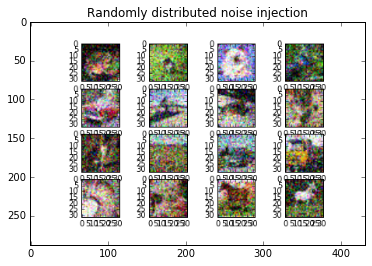

In [10]:
import numpy
from matplotlib import pyplot as plt

from hw3_utils import shared_dataset, load_data
from hw3_nn import modify
% matplotlib inline

datasets = load_data(ds_rate=1.000001,theano_shared=False)
batch_size=64

train_set_x, train_set_y = datasets[0] # randomly take 16 from these

index_array = numpy.arange(len(train_set_x))

numpy.random.shuffle(index_array)

top_16=train_set_x[index_array[:16]]

f, axarr = plt.subplots(4, 4)
for i in range(0,4):
    for j in range(0,4):
        x = modify( [top_16[4*i+j]], 0, 0, 0, 0,0, False, 1,0.05) 
        plt.axes(axarr[i,j])
        plt.imshow(x[0].transpose(1,2,0))
        
f.savefig('alltogether.png')
plt.close(f)

import matplotlib.image as mpimg
img=mpimg.imread('alltogether.png')
plt.imshow(img)
plt.title("Randomly distributed noise injection")

Implement the neural network with this augmentation, show the improvement

Training imgaes are injected with randomly distributed noise, since switch_noise =1 then noise is gaussian noise  with variance 0.01.

In [3]:
from hw3 import test_lenet
test_lenet(ds_rate=None,learning_rate=0.1, n_epochs=300,nkerns=[32, 64], batch_size=500, M=0, N=0, Rot=0 , Flip=False,switch_noise=1,var_noise=0.01, verbose=True)

... building the model
... training
swith_noise
1
training @ iter =  0
epoch 1, minibatch 80/80, validation error 54.936842 %
     epoch 1, minibatch 80/80, test error of best model 54.900000 %
training @ iter =  100
epoch 2, minibatch 80/80, validation error 47.947368 %
     epoch 2, minibatch 80/80, test error of best model 47.570000 %
training @ iter =  200
epoch 3, minibatch 80/80, validation error 43.589474 %
     epoch 3, minibatch 80/80, test error of best model 43.630000 %
training @ iter =  300
epoch 4, minibatch 80/80, validation error 41.305263 %
     epoch 4, minibatch 80/80, test error of best model 41.470000 %
epoch 5, minibatch 80/80, validation error 39.157895 %
     epoch 5, minibatch 80/80, test error of best model 39.670000 %
training @ iter =  400
epoch 6, minibatch 80/80, validation error 37.968421 %
     epoch 6, minibatch 80/80, test error of best model 37.970000 %
training @ iter =  500
epoch 7, minibatch 80/80, validation error 37.094737 %
     epoch 7, minibat

The training process for function test_lenet ran for 138.96m


### Problem 3: Implement your own achritecture to achieve at least 80% testing accuracy on CIFAR-10 test set

with all tanh 
conv-conv(widout pool)-bn-dropout-conv(with kernel 1,1)-dropout-dropout(p=1)-softmax
only augmented 

In [1]:
from hw3 import MY_lenet
MY_lenet(ds_rate=None,learning_rate=0.1, n_epochs=300,nkerns=[32, 64,64], batch_size=500,p1=0.7,p2=0.8, M=5, N=5, Rot=0, Flip=False,switch_noise=1,var_noise=0.001, verbose=True)

Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)
/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


... building the model
... training
Data Augmentation with translate with
5
5
swith_noise
1
training @ iter =  0
epoch 1, minibatch 80/80, validation error 61.031579 %
     epoch 1, minibatch 80/80, test error of best model 61.340000 %
training @ iter =  100
epoch 2, minibatch 80/80, validation error 48.663158 %
     epoch 2, minibatch 80/80, test error of best model 48.430000 %
training @ iter =  200
epoch 3, minibatch 80/80, validation error 40.536842 %
     epoch 3, minibatch 80/80, test error of best model 40.980000 %
training @ iter =  300
epoch 4, minibatch 80/80, validation error 37.547368 %
     epoch 4, minibatch 80/80, test error of best model 37.950000 %
epoch 5, minibatch 80/80, validation error 34.136842 %
     epoch 5, minibatch 80/80, test error of best model 34.930000 %
training @ iter =  400
epoch 6, minibatch 80/80, validation error 31.926316 %
     epoch 6, minibatch 80/80, test error of best model 33.560000 %
training @ iter =  500
epoch 7, minibatch 80/80, validati

The training process for function MY_lenet ran for 226.69m


### Problem 4: Implement the convolutional neural network depicted in this problem

In [13]:
from hw3 import MY_CNN
MY_CNN( n_epochs=128, batch_size=500)